In [2]:
import numpy as np 

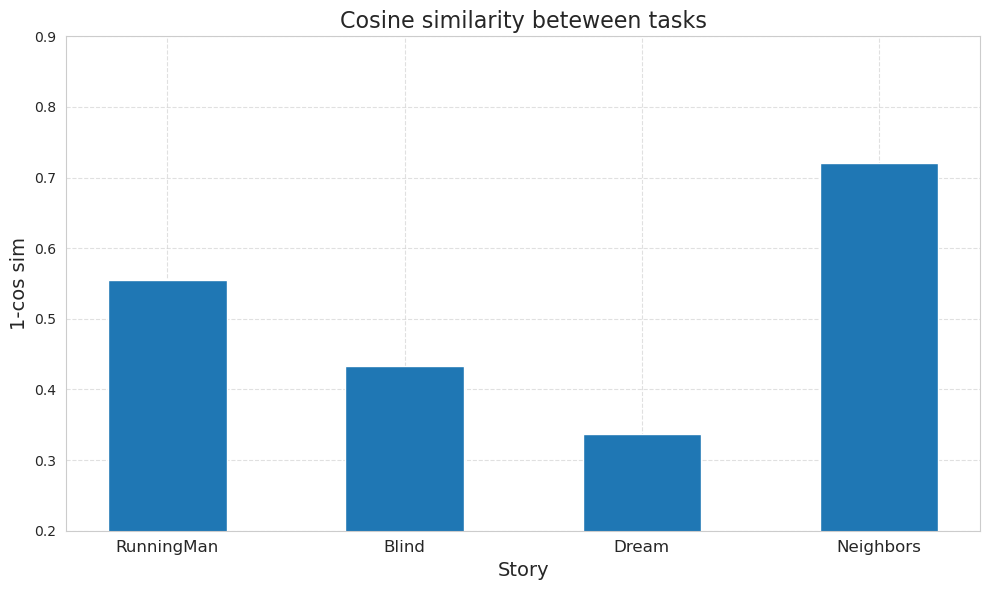

In [211]:
# plot rubric similarity across stories 
# run, blind, dream, nei 
cos_sim = [ 0.5549726247661345, 0.43340896438000936, 0.3362418797792501, 0.720122981112659]

plt.figure(figsize=(10, 6))
plt.bar([0, 1, 2, 3],(np.array(cos_sim)), width = 0.5)
# 플롯 설정
plt.title('Cosine similarity beteween tasks', fontsize=16)
plt.xlabel('Story', fontsize=14)
plt.ylabel('1-cos sim', fontsize=14)
plt.ylim([0.2, 0.9])
plt.xticks(ticks=[0, 1, 2, 3], labels=['RunningMan', 'Blind', 'Dream', 'Neighbors'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()
plt.show()


# Behavior comaprison

In [88]:
# Load data 
content_score_matrix_va = np.zeros((4,50,30,2))
content_score_matrix_av = np.zeros((4,50,31,2))

content_score_matrix_va[0,:,:,:] = np.load('results/RunningMan_content_score_matrix_va2.npy')
content_score_matrix_av[0,:,:,:] = np.load('results/RunningMan_content_score_matrix_av2.npy')

content_score_matrix_va[1,:,:,:] = np.load('results/BlindDate_content_score_matrix_va2.npy')
content_score_matrix_av[1,:,:,:] = np.load('results/BlindDate_content_score_matrix_av2.npy')

content_score_matrix_va[2,:,:,:] = np.load('results/Dream_content_score_matrix_va2.npy')
content_score_matrix_av[2,:,:,:] = np.load('results/Dream_content_score_matrix_av2.npy')

content_score_matrix_va[3,:,:,:] = np.load('results/Neighbors_content_score_matrix_va2.npy')
content_score_matrix_av[3,:,:,:] = np.load('results/Neighbors_content_score_matrix_av2.npy')


np.save('results/all_story_content_score_matrix_va2.npy', content_score_matrix_va)
np.save('results/all_story_content_score_matrix_av2.npy', content_score_matrix_av)

In [105]:
from scipy.stats import ttest_rel, ttest_ind
content_score_va  = np.mean(content_score_matrix_va, axis=1)
content_score_av = np.mean(content_score_matrix_av, axis=1)

content_concat = np.concatenate((content_score_va,content_score_av),axis =1)
# content_concat1 = np.concatenate((content_score_va[:,:,0],content_score_av[:,:,0]),axis =1)
# content_concat2 = np.concatenate((content_score_va[:,:,1],content_score_av[:,:,1]),axis =1)

print(content_score_va.shape)
print(content_concat.shape)

(4, 30, 2)
(4, 61, 2)


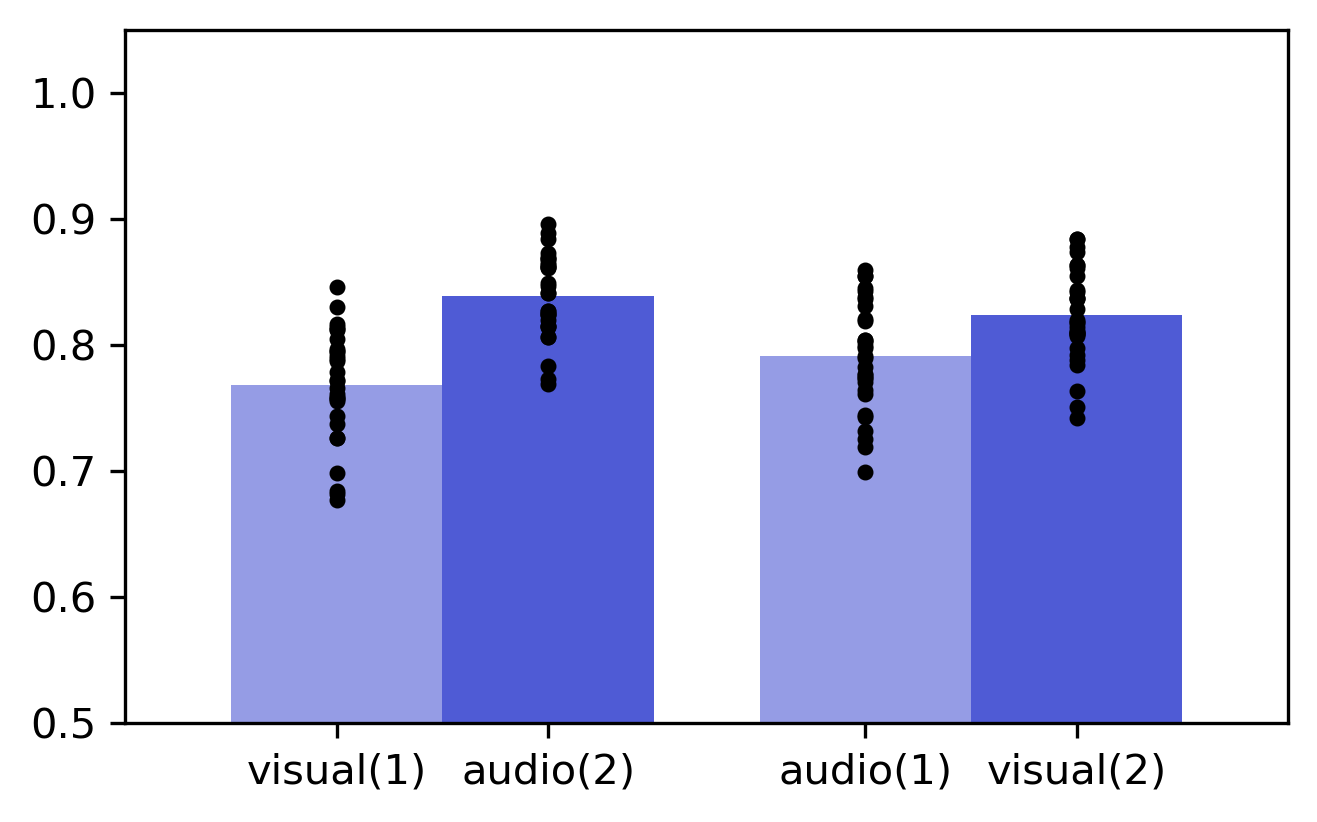

In [152]:
# 1. overall performance increase? 
import matplotlib.pyplot as plt
from scipy.stats import sem

fig, ax = plt.subplots(1,1,figsize=(5,3),  dpi=300, sharey=True)
ax.bar(0+0.1, np.mean(mean_content_score_matrix_va, axis=0)[0], 
            #yerr=sem(mean_content_score_matrix_va, axis=0)[0], capsize=3, width=0.6,
            color='#4f5bd5', alpha = 0.6)
ax.bar(1-0.1, np.mean(mean_content_score_matrix_va, axis=0)[1], 
            #yerr=sem(mean_content_score_matrix_va, axis=0)[1], capsize=3, width=0.6,
            color='#4f5bd5')
ax.bar(2+0.1, np.mean(mean_content_score_matrix_av, axis=0)[0], 
            #yerr=sem(mean_content_score_matrix_av, axis=0)[0], capsize=3, width=0.6,
            color='#4f5bd5',alpha = 0.6)
ax.bar(3-0.1, np.mean(mean_content_score_matrix_av, axis=0)[1], 
            #yerr=sem(mean_content_score_matrix_av, axis=0)[1], capsize=3, width=0.6,
            color='#4f5bd5',)



# 산포도 그리기 - 개별 점수 (VA)
ax.scatter(np.full(mean_content_score_matrix_va.shape[0], 0+0.1), mean_content_score_matrix_va[:, 0], color='black', zorder=2, s=8)
ax.scatter(np.full(mean_content_score_matrix_va.shape[0], 1-0.1), mean_content_score_matrix_va[:, 1], color='black', zorder=2, s=8)

# 산포도 그리기 - 개별 점수 (AV)
ax.scatter(np.full(mean_content_score_matrix_av.shape[0], 2+0.1), mean_content_score_matrix_av[:, 0], color='black', zorder=2, s=8)
ax.scatter(np.full(mean_content_score_matrix_av.shape[0], 3-0.1), mean_content_score_matrix_av[:, 1], color='black', zorder=2, s=8)



ax.set_xticks([0+0.1,1-0.1,2+0.1,3-0.1])
ax.set_xticklabels(['visual(1)', 'audio(2)', 'audio(1)', 'visual(2)'])
ax.set_ylim(0.5, 1.05)
ax.set_xlim(-0.7,3.7)

plt.savefig("Mean Contents Score.jpg")

In [148]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

n_stories = 4  # 이야기 수
n_subjects = 61  # 참가자 수
n_tasks = 2  # 과제 종류 (first, second)

mean_content_concat = content_concat.mean(axis=0)  # (61,2)
content_concat = np.concatenate((mean_content_concat[:,0], mean_content_concat[:,1]))
content_concat_score = np.concatenate((mean_content_concat[:,0], mean_content_concat[:,1])) # (122,)

# DataFrame을 반복측정 ANOVA 형식으로 변환
data = {'subject': np.tile(np.arange(n_subjects), n_tasks),  # 참가자 반복
        'task': np.repeat(np.arange(n_tasks), n_subjects),  # 이야기 반복
        'score': content_concat_score}  # 점수 데이터 플래튼하여 삽입

df = pd.DataFrame(data)

# 반복측정 ANOVA 실행
# 종속변수: 'score', 피험자: 'subject', 독립변수: 'story'와 'task'
rm_anova = AnovaRM(df, depvar='score', subject='subject', within=['task']).fit()

# 결과 출력
print(rm_anova)

# p-value 확인 (이야기와 과제 종류에 따른 효과 확인)
p_story = rm_anova.anova_table['Pr > F'][0]  # 이야기 효과

# 유의성 판단
if p_story < 0.05:
    print(f"There is a significant effect of task on the score (p = {p_story:.4f})")
else:
    print(f"No significant effect of task on the score (p = {p_story:.4f})")


               Anova
     F Value  Num DF  Den DF Pr > F
-----------------------------------
task 137.1495 1.0000 60.0000 0.0000

There is a significant effect of task on the score (p = 0.0000)


In [137]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

mean_content_concat = content_concat.mean(axis=0)  # (61,2)
concat_socre = np.concatenate((mean_content_concat[:,0], mean_content_concat[:,1])) # (122,)


n_subjects = 61  # 참가자 수
n_tasks = 2  # 과제 종류 (va, av)


# DataFrame을 반복측정 ANOVA 형식으로 변환
data = {'subject': np.tile(np.arange(n_subjects), n_tasks),  # 참가자 반복
        'cond': np.repeat(np.arange(n_tasks), n_subjects),  # first,second 
        'task':np.concatenate((np.repeat((0,1),30), np.repeat((1,0),31))),# modality
        'score': concat_socre}  # 점수 데이터 플래튼하여 삽입

df = pd.DataFrame(data)


In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set up a mixed model with subject as a random effect
model = smf.mixedlm("score ~ task + cond + task:cond", df, groups=df["subject"])
mixed_lm_result = model.fit()

# Print the results
print(mixed_lm_result.summary())


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score   
No. Observations: 122     Method:             REML    
No. Groups:       61      Scale:              0.0004  
Min. group size:  2       Log-Likelihood:     230.4615
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   0.768    0.007 106.086 0.000  0.754  0.782
task        0.023    0.010   2.286 0.022  0.003  0.043
cond        0.055    0.010   5.462 0.000  0.036  0.075
task:cond  -0.008    0.019  -0.414 0.679 -0.045  0.029
Group Var   0.001    0.018                            



/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


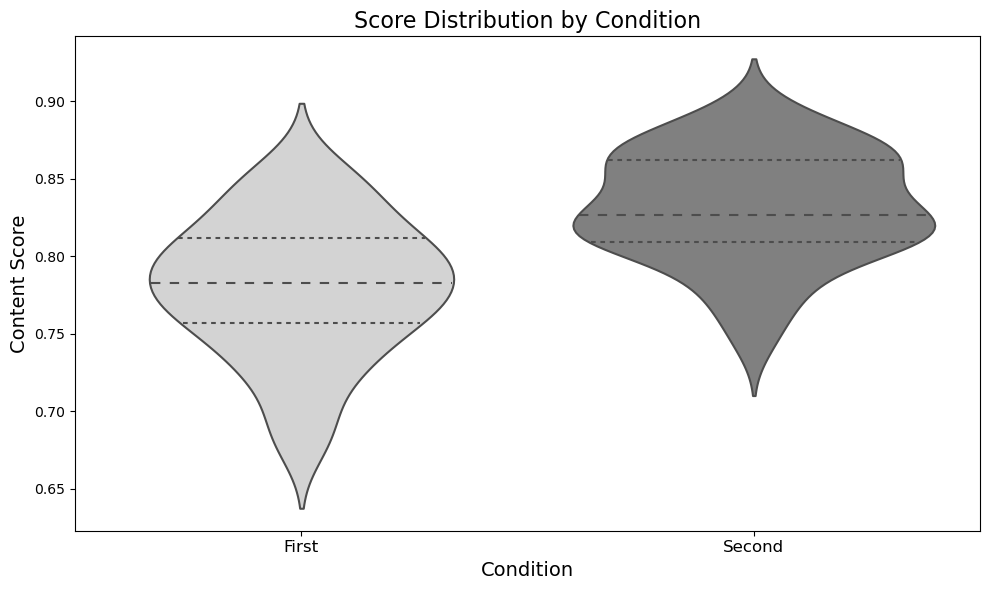

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))

# Seaborn 바이올린 플롯
sns.violinplot(x='cond', y='score', data=df, inner="quart", palette=['#D3D3D3', '#808080'])

# 플롯 설정
plt.title('Score Distribution by Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Content Score', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['First', 'Second'], fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()

In [130]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

mean_content_concat = content_concat.mean(axis=0)  # (61,2)
concat_socre = np.concatenate((mean_content_concat[:,0], mean_content_concat[:,1])) # (122,)


n_subjects = 61  # 참가자 수
n_tasks = 2  # 과제 종류 (va, av)


# DataFrame을 반복측정 ANOVA 형식으로 변환
data = {'subject': np.tile(np.arange(n_subjects), n_tasks),  # 참가자 반복
        'cond': np.repeat(np.arange(n_tasks), n_subjects),  # first,second 
        'task':np.concatenate((mod1, mod2)), 
        'score': concat_socre}  # 점수 데이터 플래튼하여 삽입

df = pd.DataFrame(data)

# 반복측정 ANOVA 실행
# 종속변수: 'score', 피험자: 'subject', 독립변수: 'story'와 'task'
rm_anova = AnovaRM(df, depvar='score', subject='subject', within=['task', 'cond']).fit()

# 결과 출력
print(rm_anova)

# p-value 확인 (이야기와 과제 종류에 따른 효과 확인)
p_story = rm_anova.anova_table['Pr > F'][0]  # 이야기 효과
p_task = rm_anova.anova_table['Pr > F'][1]  # 과제 종류 효과
p_interaction = rm_anova.anova_table['Pr > F'][2]  # 상호작용 효과

# 유의성 판단
if p_story < 0.05:
    print(f"There is a significant effect of story on the score (p = {p_story:.4f})")
else:
    print(f"No significant effect of story on the score (p = {p_story:.4f})")

if p_task < 0.05:
    print(f"There is a significant effect of task on the score (p = {p_task:.4f})")
else:
    print(f"No significant effect of task on the score (p = {p_task:.4f})")

if p_interaction < 0.05:
    print(f"There is a significant interaction between story and task on the score (p = {p_interaction:.4f})")
else:
    print(f"No significant interaction between story and task on the score (p = {p_interaction:.4f})")


ValueError: Data is unbalanced.

# Integration score

In [166]:
content_score_av.shape

(31, 2)

In [167]:
import numpy as np
from scipy.stats import ttest_ind

# # 데이터 준비 (이야기 * 참가자 * 과제 종류)
content_score_va = np.mean(content_score_matrix_va, axis=(0,1))
content_score_av = np.mean(content_score_matrix_av, axis=(0,1))

diff_concat_score1 = content_score_va[:,1] - content_score_va[:,0]
diff_concat_score2 = content_score_av[:,1] - content_score_av[:,0]
concat_socre = np.concatenate((diff_concat_score1,diff_concat_score2))

# 두 조건에 대한 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(diff_concat_score1, diff_concat_score2, equal_var=False)  # 등분산 가정을 안 할 경우 equal_var=False

# 결과 출력
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 유의성 판단
if p_value < 0.05:
    print("There is a significant difference between the two conditions.")
else:
    print("There is no significant difference between the two conditions.")


T-statistic: 5.2797
P-value: 0.0000
There is a significant difference between the two conditions.


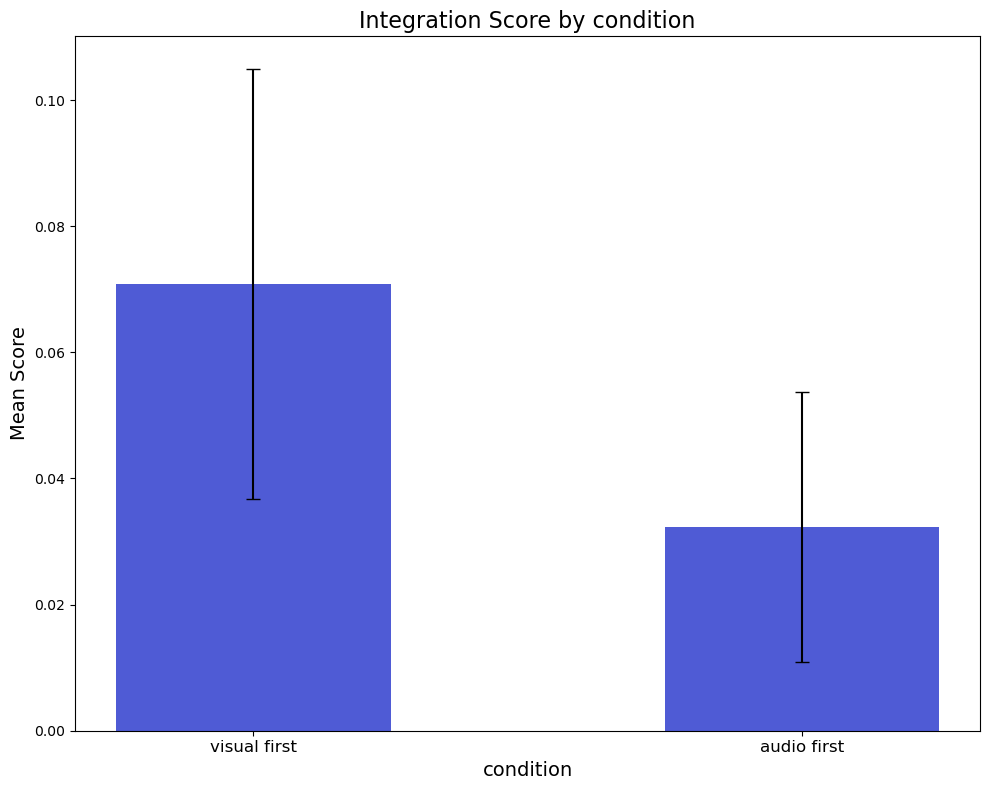

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'subject': np.arange(n_subjects),  # 참가자 반복
        'cond': np.concatenate((np.zeros(30), np.ones(31))),  # first,second 
        'score': concat_socre}  # 점수 데이터 플래튼하여 삽입 


df = pd.DataFrame(data)

# 각 이야기별 평균과 표준편차 계산
story_means = df.groupby('cond')['score'].mean()
story_std = df.groupby('cond')['score'].std()

# Bar plot 생성
plt.figure(figsize=(10, 8))
plt.bar(story_means.index, story_means, yerr=story_std, capsize=5, color='#4f5bd5', width = 0.5)

# 플롯 설정
plt.title('Integration Score by condition', fontsize=16)
plt.xlabel('condition', fontsize=14)
plt.ylabel('Mean Score', fontsize=14)
#plt.ylim([-0.05,0.2])
plt.xticks(ticks=[0, 1], labels=['visual first', 'audio first'], fontsize=12)
plt.grid(False)

# 그래프 표시
plt.tight_layout()
plt.show()


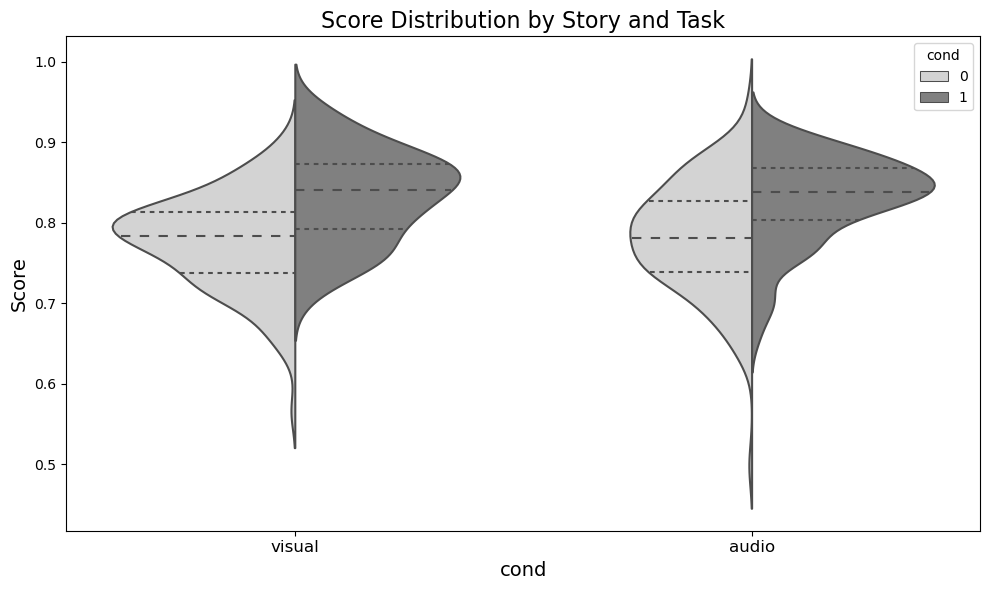

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이야기와 과제 종류별로 바이올린 플롯 생성
plt.figure(figsize=(10, 6))

# Seaborn을 사용한 바이올린 플롯
sns.violinplot(x='task', y='score', hue = 'cond', data=df, split=True, inner="quart", palette=['#D3D3D3', '#808080'])

# 플롯 설정
plt.title('Score Distribution by Story and Task', fontsize=16)
plt.xlabel('cond', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['visual', 'audio'], fontsize=12)
#plt.legend(title='Task', labels=['Task VA', 'Task AV'], fontsize=12)
plt.grid(False)

# 그래프 표시
plt.tight_layout()
plt.show()


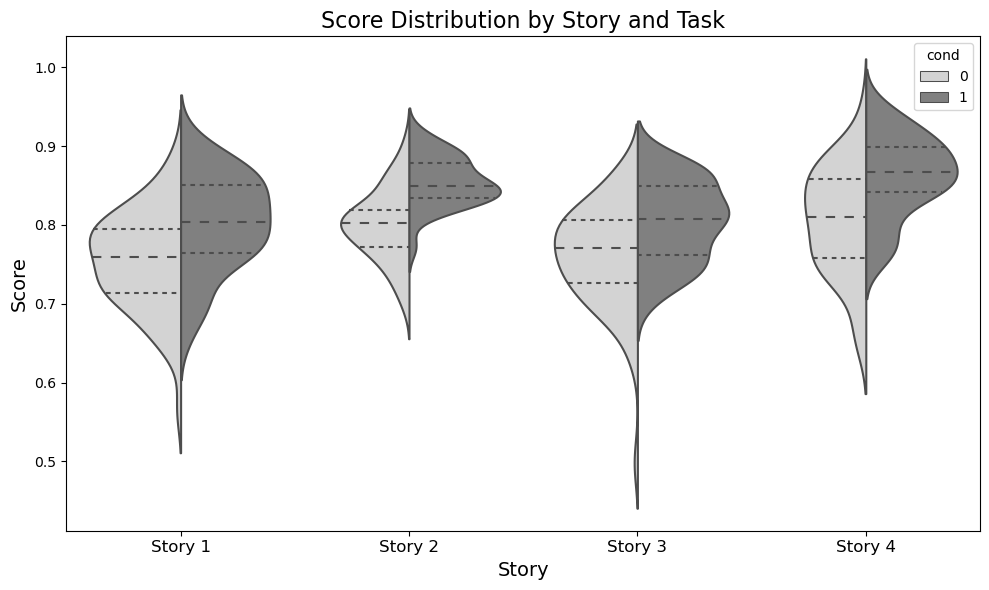

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이야기와 과제 종류별로 바이올린 플롯 생성
plt.figure(figsize=(10, 6))

# Seaborn을 사용한 바이올린 플롯
sns.violinplot(x='story', y='score', hue = 'cond', data=df, split=True, inner="quart", palette=['#D3D3D3', '#808080'])

# 플롯 설정
plt.title('Score Distribution by Story and Task', fontsize=16)
plt.xlabel('Story', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Story 1', 'Story 2', 'Story 3', 'Story 4'], fontsize=12)
#plt.legend(title='Task', labels=['Task VA', 'Task AV'], fontsize=12)
plt.grid(False)

# 그래프 표시
plt.tight_layout()
plt.show()


In [64]:
mean_content_concat = content_concat.mean(axis=1)
mean_content_concat.shape

(4, 2)

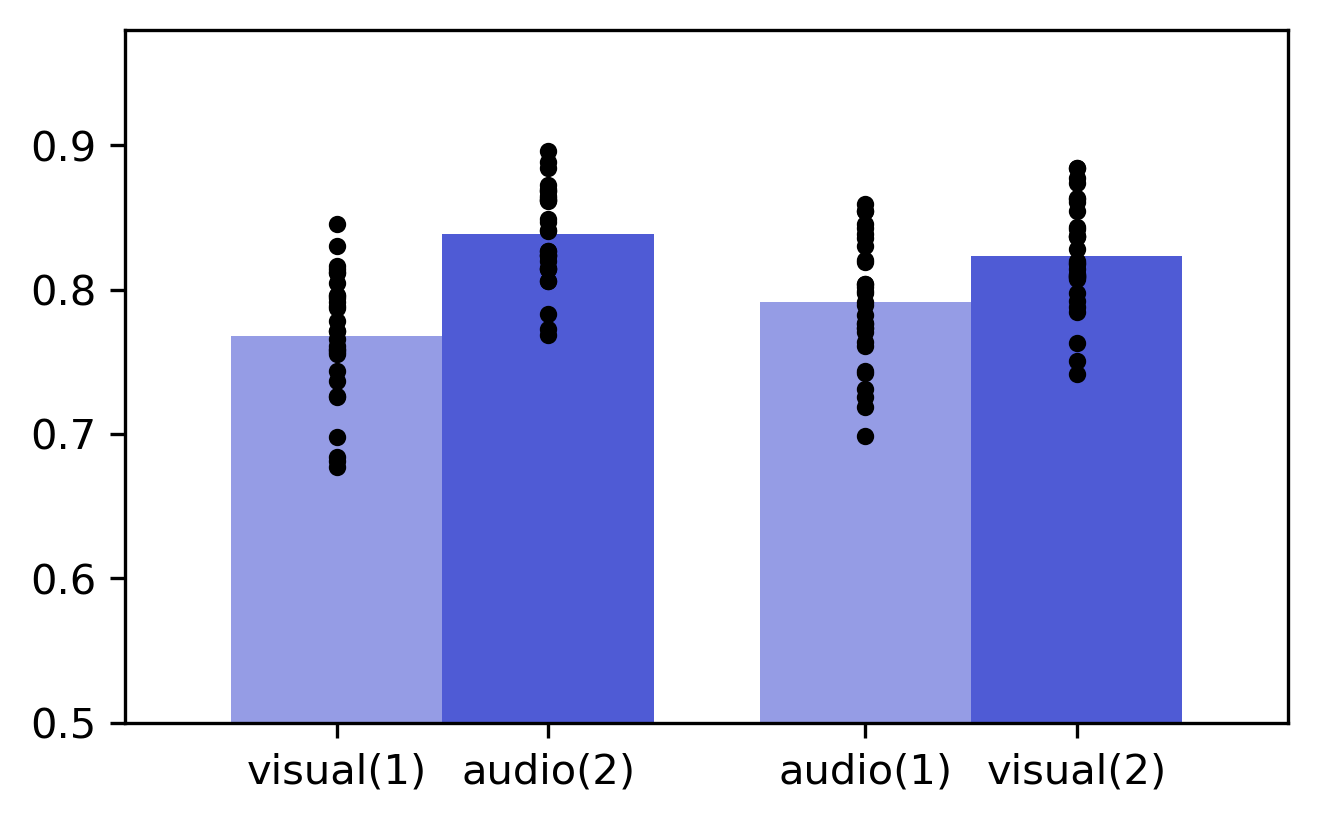

In [176]:
import matplotlib.pyplot as plt
from scipy.stats import sem

fig, ax = plt.subplots(1,1,figsize=(5,3),  dpi=300, sharey=True)
ax.bar(0+0.1, np.mean(mean_content_score_matrix_va, axis=0)[0], 
            #yerr=sem(mean_content_score_matrix_va, axis=0)[0], capsize=3, width=0.6,
            color='#4f5bd5', alpha = 0.6)
ax.bar(1-0.1, np.mean(mean_content_score_matrix_va, axis=0)[1], 
            #yerr=sem(mean_content_score_matrix_va, axis=0)[1], capsize=3, width=0.6,
            color='#4f5bd5')
ax.bar(2+0.1, np.mean(mean_content_score_matrix_av, axis=0)[0], 
            #yerr=sem(mean_content_score_matrix_av, axis=0)[0], capsize=3, width=0.6,
            color='#4f5bd5',alpha = 0.6)
ax.bar(3-0.1, np.mean(mean_content_score_matrix_av, axis=0)[1], 
            #yerr=sem(mean_content_score_matrix_av, axis=0)[1], capsize=3, width=0.6,
            color='#4f5bd5',)



# 산포도 그리기 - 개별 점수 (VA)
ax.scatter(np.full(mean_content_score_matrix_va.shape[0], 0+0.1), mean_content_score_matrix_va[:, 0], color='black', zorder=2,s=10)
ax.scatter(np.full(mean_content_score_matrix_va.shape[0], 1-0.1), mean_content_score_matrix_va[:, 1], color='black', zorder=2,s=10)

# 산포도 그리기 - 개별 점수 (AV)
ax.scatter(np.full(mean_content_score_matrix_av.shape[0], 2+0.1), mean_content_score_matrix_av[:, 0], color='black', zorder=2,s=10)
ax.scatter(np.full(mean_content_score_matrix_av.shape[0], 3-0.1), mean_content_score_matrix_av[:, 1], color='black', zorder=2,s=10)



ax.set_xticks([0+0.1,1-0.1,2+0.1,3-0.1])
ax.set_xticklabels(['visual(1)', 'audio(2)', 'audio(1)', 'visual(2)'])
ax.set_ylim(0.5, 0.98)
ax.set_xlim(-0.7,3.7)

plt.savefig("Mean Contants Score.jpg")

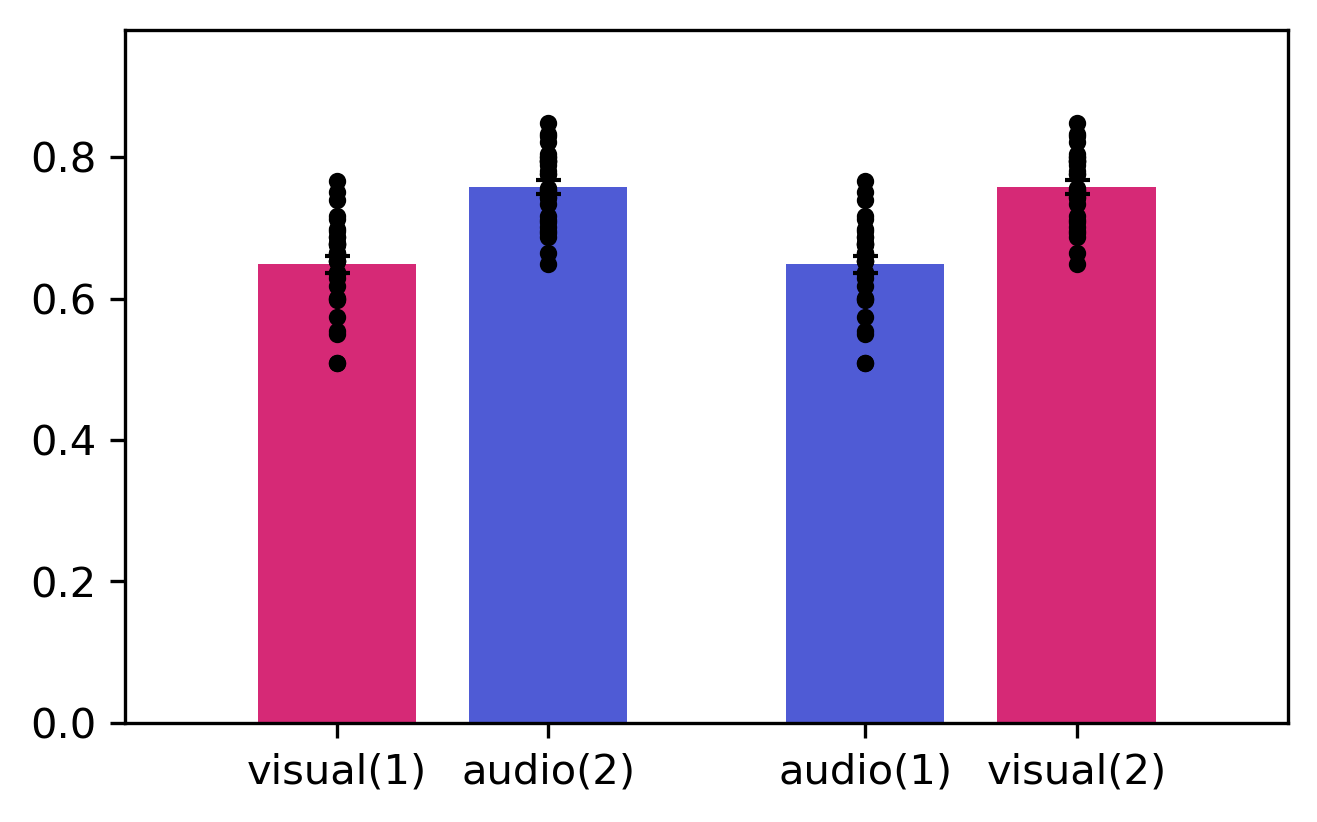

In [116]:
import matplotlib.pyplot as plt
from scipy.stats import sem

fig, ax = plt.subplots(1,1,figsize=(5,3),  dpi=300, sharey=True)
ax.bar([0+0.1,1-0.1], np.mean(mean_content_score_matrix_va, axis=0), 
            yerr=sem(mean_content_score_matrix_va, axis=0), capsize=3, width=0.6,
            color=['#d62976', '#4f5bd5'])
ax.bar([2+0.1,3-0.1], np.mean(mean_content_score_matrix_av, axis=0), 
            yerr=sem(mean_content_score_matrix_av, axis=0), capsize=3, width=0.6,
            color=['#4f5bd5','#d62976'])


# 산포도 그리기 - 개별 점수 (VA)
ax.scatter(np.full(mean_content_score_matrix_va.shape[0], 0+0.1), mean_content_score_matrix_va[:, 0], color='black', zorder=2,s=10)
ax.scatter(np.full(mean_content_score_matrix_va.shape[0], 1-0.1), mean_content_score_matrix_va[:, 1], color='black', zorder=2,s=10)

# 산포도 그리기 - 개별 점수 (AV)
ax.scatter(np.full(mean_content_score_matrix_av.shape[0], 2+0.1), mean_content_score_matrix_av[:, 0], color='black', zorder=2,s=10)
ax.scatter(np.full(mean_content_score_matrix_av.shape[0], 3-0.1), mean_content_score_matrix_av[:, 1], color='black', zorder=2,s=10)



ax.set_xticks([0+0.1,1-0.1,2+0.1,3-0.1])
ax.set_xticklabels(['visual(1)', 'audio(2)', 'audio(1)', 'visual(2)'])
ax.set_ylim(0, 0.98)
ax.set_xlim(-0.7,3.7)

plt.savefig("Mean Contants Score.jpg")

In [27]:
pwd

'/home/sincerely/jupyterlab/3. Behav/VCNL'

# Retrieval score

In [178]:
# Load data 
retrieval_score_matrix_va = np.zeros((4,50,30,2,50))
retrieval_score_matrix_av = np.zeros((4,50,31,2,50))

retrieval_score_matrix_va[0,:,:,:] = np.load('results/BlindDate_retrieval_score_matrix_va2.npy')
retrieval_score_matrix_av[0,:,:,:] = np.load('results/BlindDate_retrieval_score_matrix_av2.npy')

retrieval_score_matrix_va[1,:,:,:] = np.load('results/Dream_retrieval_score_matrix_va2.npy')
retrieval_score_matrix_av[1,:,:,:] = np.load('results/Dream_retrieval_score_matrix_av2.npy')

retrieval_score_matrix_va[2,:,:,:] = np.load('results/Neighbors_retrieval_score_matrix_va2.npy')
retrieval_score_matrix_av[2,:,:,:] = np.load('results/Neighbors_retrieval_score_matrix_av2.npy')

retrieval_score_matrix_va[3,:,:,:] = np.load('results/RunningMan_retrieval_score_matrix_va2.npy')
retrieval_score_matrix_av[3,:,:,:] = np.load('results/RunningMan_retrieval_score_matrix_av2.npy')


retrieval_score_matrix_va = retrieval_score_matrix_va.mean(axis=1)
retrieval_score_matrix_av = retrieval_score_matrix_av.mean(axis=1)

corr_va = np.zeros((4,30))
corr_av = np.zeros((4,31))
for s in range(4):
    for sub in range(30): 

        first_va_traj = retrieval_score_matrix_va[s,sub,0,:] 
        second_va_traj = retrieval_score_matrix_va[s,sub,1,:] 
        corr_va[s,sub] = np.corrcoef(first_va_traj,second_va_traj)[0,1]
        
        first_av_traj = retrieval_score_matrix_av[s,sub,0,:] 
        second_av_traj = retrieval_score_matrix_av[s,sub,1,:] 
        corr_av[s,sub] = np.corrcoef(first_av_traj,second_av_traj)[0,1]

np.save('results/all_story_retrieval_score_matrix_va2.npy', corr_va)
np.save('results/all_story_retrieval_score_matrix_av2.npy', corr_av)

In [181]:
import numpy as np
from scipy.stats import ttest_ind

# # 데이터 준비 (이야기 * 참가자 * 과제 종류)
mean_corr_va = corr_va.mean(axis = 0)
mean_corr_av = corr_av.mean(axis = 0)

concat_socre = np.concatenate((mean_corr_va,mean_corr_av))

# 두 조건에 대한 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(mean_corr_va, mean_corr_av, equal_var=False)  # 등분산 가정을 안 할 경우 equal_var=False

# 결과 출력
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 유의성 판단
if p_value < 0.05:
    print("There is a significant difference between the two conditions.")
else:
    print("There is no significant difference between the two conditions.")


T-statistic: -1.4501
P-value: 0.1537
There is no significant difference between the two conditions.


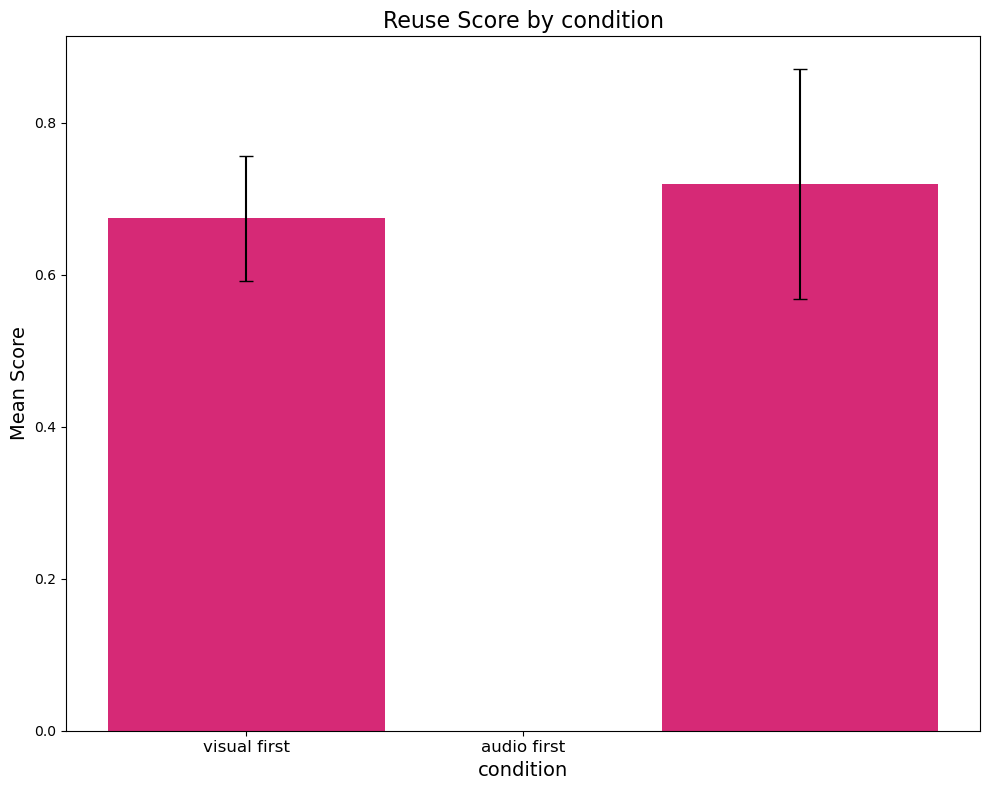

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'subject': np.arange(n_subjects),  # 참가자 반복
        'cond': np.concatenate((np.zeros(30), np.ones(31))),  # first,second 
        'score': concat_socre}  # 점수 데이터 플래튼하여 삽입 


df = pd.DataFrame(data)

# 각 이야기별 평균과 표준편차 계산
story_means = df.groupby('cond')['score'].mean()
story_std = df.groupby('cond')['score'].std()

# Bar plot 생성
plt.figure(figsize=(10, 8))
plt.bar(story_means.index, story_means, yerr=story_std, capsize=5, color='#d62976', width = 0.5)

# 플롯 설정
plt.title('Reuse Score by condition', fontsize=16)
plt.xlabel('condition', fontsize=14)
plt.ylabel('Mean Score', fontsize=14)
#plt.ylim([-0.05,0.2])
plt.xticks(ticks=[0, 0.5], labels=['visual first', 'audio first'], fontsize=12)
plt.grid(False)

# 그래프 표시
plt.tight_layout()
plt.show()

In [55]:
corr_concat = np.concatenate((corr_va,corr_av),axis=1)
print(corr_concat.shape)
# content_concat.shape -> (4, 61, 2)로 설정됨. (이야기, 참가자, 과제 종류)
concat_socre = np.concatenate((corr_concat[0,:],corr_concat[1,:],corr_concat[2,:],corr_concat[3,:] ))

n_stories = 4  # 이야기 수
n_subjects = 61  # 참가자 수

# DataFrame을 반복측정 ANOVA 형식으로 변환
data = {'subject': np.tile(np.arange(n_subjects), n_stories),  # 참가자 반복
        'story': np.repeat(np.arange(n_stories), n_subjects),  # 이야기 반복
        'score': concat_socre}  # 점수 데이터 플래튼하여 삽입

df = pd.DataFrame(data)

# 반복측정 ANOVA 실행
# 종속변수: 'score', 피험자: 'subject', 독립변수: 'story'와 'task'
rm_anova = AnovaRM(df, depvar='score', subject='subject', within=['story']).fit()

# 결과 출력
print(rm_anova)

# p-value 확인 (이야기와 과제 종류에 따른 효과 확인)
p_story = rm_anova.anova_table['Pr > F'][0]  # 이야기 효과

# 유의성 판단
if p_story < 0.05:
    print(f"There is a significant effect of cond on the score (p = {p_story:.4f})")
else:
    print(f"No significant effect of story on the score (p = {p_story:.4f})")

(4, 61)
               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
story  4.8923 3.0000 180.0000 0.0027

There is a significant effect of story on the score (p = 0.0027)


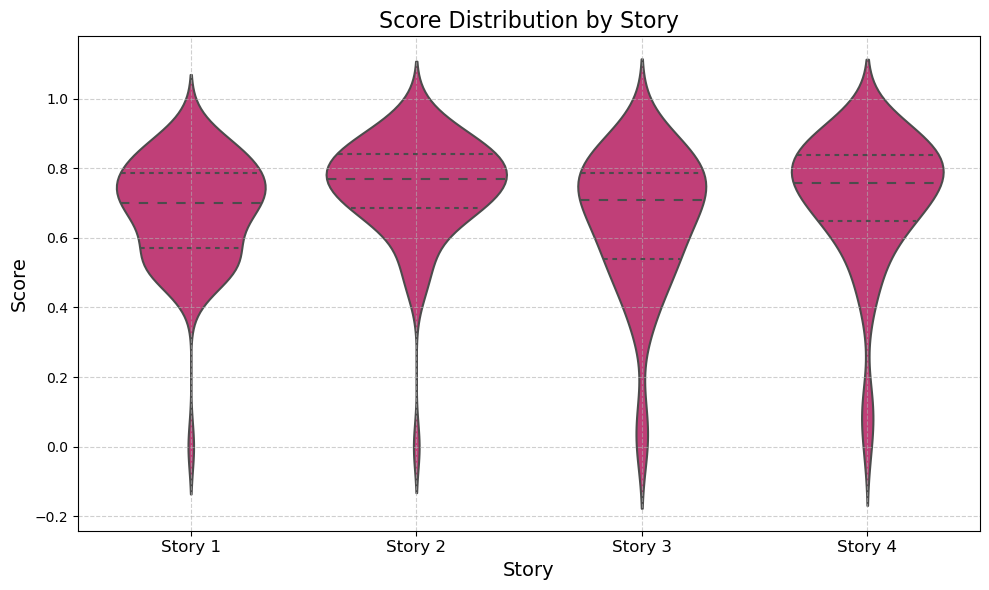

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))

# Seaborn 바이올린 플롯
sns.violinplot(x='story', y='score', data=df, inner="quart", color = '#d62976')

# 플롯 설정
plt.title('Score Distribution by Story', fontsize=16)
plt.xlabel('Story', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Story 1', 'Story 2', 'Story 3', 'Story 4'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()
plt.show()


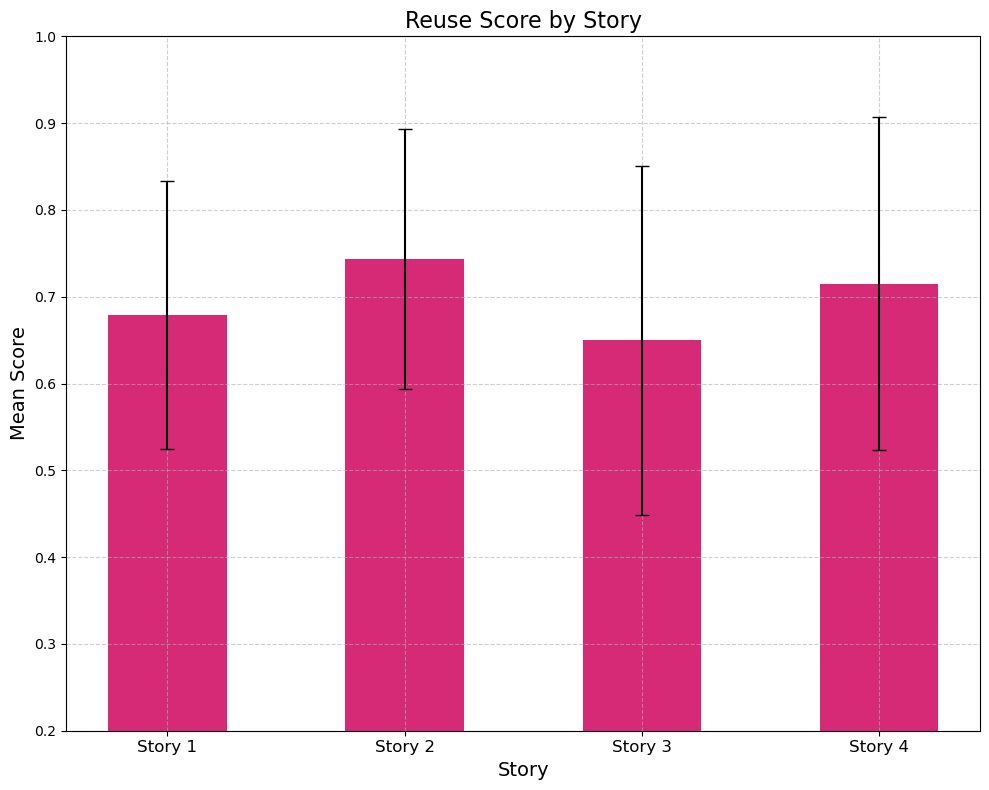

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 이야기별 평균과 표준편차 계산
story_means = df.groupby('story')['score'].mean()
story_std = df.groupby('story')['score'].std()

# Bar plot 생성
plt.figure(figsize=(10, 8))
plt.bar(story_means.index, story_means, yerr=story_std, capsize=5, color='#d62976', width = 0.5)

# 플롯 설정
plt.title('Reuse Score by Story', fontsize=16)
plt.xlabel('Story', fontsize=14)
plt.ylabel('Mean Score', fontsize=14)
plt.ylim([0.2,1])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Story 1', 'Story 2', 'Story 3', 'Story 4'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()
plt.show()


In [31]:
corr_concat = np.concatenate((corr_va,corr_av),axis=1)

print(corr_va.shape)

(4, 30)


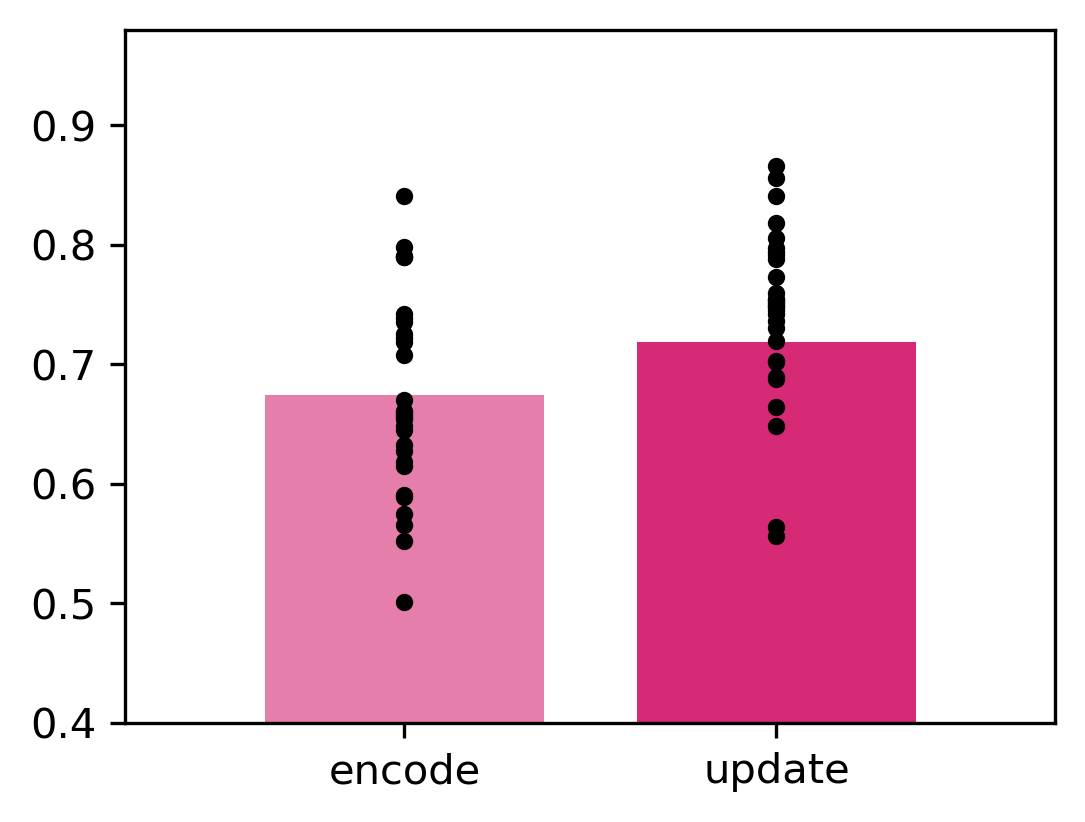

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem



# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300, sharey=True)

# 바 그래프 그리기
ax.bar(0+0.1, corr_va.mean(axis=(0,1)), width=0.6,
       color=['#d62976'], alpha = 0.6)
ax.bar(1-0.1, corr_av.mean(axis=(0,1)), width=0.6,
       color=['#d62976'])


# 산포도 그리기
ax.scatter(np.full(30, 0+0.1), corr_va.mean(axis=0), color='black', zorder=2, s= 10)
ax.scatter(np.full(31, 1-0.1), corr_av.mean(axis=0), color='black', zorder=2, s = 10)

# x축과 y축 설정
ax.set_xticks([0+0.1, 1-0.1])
ax.set_xticklabels(['encode', 'update'])
ax.set_ylim(0.4, 0.98)
ax.set_xlim(-0.5, 1.5)
ax.grid(False)
# 그래프 저장
plt.savefig("Mean_Contants_Score_with_Scatter.jpg")

# 그래프 출력
plt.show()


In [33]:
content_score_matrix_va.mean(axis=1).shape
content_diff_score_va = content_score_matrix_va.mean(axis=1)[:,:,1] - content_score_matrix_va.mean(axis=1)[:,:,0]
content_diff_score_av = content_score_matrix_av.mean(axis=1)[:,:,0] - content_score_matrix_av.mean(axis=1)[:,:,1]
print(content_diff_score_va.shape)

content_diff_concat = np.append(content_diff_score_va.mean(axis=0), content_diff_score_av.mean(axis=0), axis = 0)
content_diff_concat.shape

(4, 30)


(61,)

In [44]:
data['subject']

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16,
       17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21,
       21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25,
       25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29,
       29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33,
       34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38,
       38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42,
       42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46,
       46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50,
       51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 54, 55,
       55, 55, 55, 56, 56

In [53]:
content_diff_concat = np.concatenate((content_diff_score_va,content_diff_score_av),axis=1)
print(corr_concat.shape)

from statsmodels.stats.anova import AnovaRM

# 참가자 수 및 이야기 수 설정
n_subjects = 61
n_stories = 4

# 데이터 준비 (4개의 이야기 * 61명의 참가자)
# corr_concat는 (4, 61)의 크기를 가지며, 4개의 이야기와 61명의 참가자
corr_concat = np.concatenate((corr_va,corr_av),axis=1)
corr_socre = np.concatenate((corr_concat[0,:],corr_concat[1,:],corr_concat[2,:],corr_concat[3,:] ))

# 실제 데이터는 위의 corr_concat 변수를 대체할 수 있습니다.

# 데이터를 변환하여 DataFrame 생성 (AnovaRM을 사용하기 위한 구조로 변환)
data = {'subject': np.tile(np.arange(n_subjects), n_stories),  # 각 참가자 반복
        'story': np.repeat(['story1', 'story2', 'story3', 'story4'], n_subjects),  # 이야기 반복
        'score': corr_socre}  # 각 참가자의 이야기 별 평정 결과

df = pd.DataFrame(data)

# 반복측정 ANOVA 수행
# 종속 변수: 'score', 독립 변수: 'story', 참가자: 'subject'
rm_anova = AnovaRM(df, depvar='score', subject='subject', within=['story']).fit()

# 결과 출력
print(rm_anova)

# 유의한지 확인
p_value = rm_anova.anova_table['Pr > F'][0]
if p_value < 0.05:
    print(f"There is a significant difference between the stories (p = {p_value:.4f})")
else:
    print(f"No significant difference between the stories (p = {p_value:.4f})")

(4, 61)
               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
story  4.8923 3.0000 180.0000 0.0027

There is a significant difference between the stories (p = 0.0027)


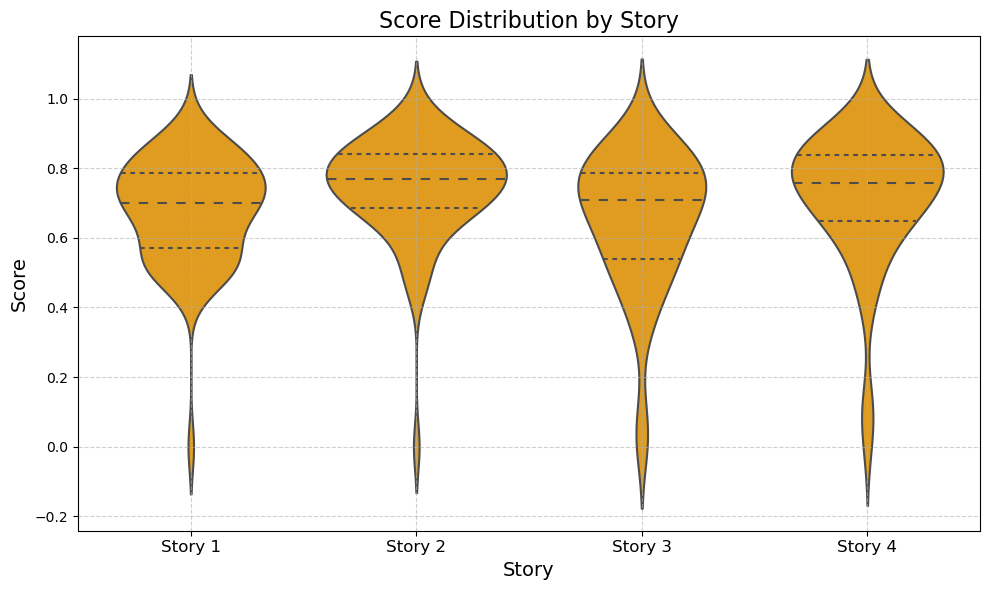

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))

# Seaborn 바이올린 플롯
sns.violinplot(x='story', y='score', data=df, inner="quart", color = 'orange')

# 플롯 설정
plt.title('Score Distribution by Story', fontsize=16)
plt.xlabel('Story', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Story 1', 'Story 2', 'Story 3', 'Story 4'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.tight_layout()

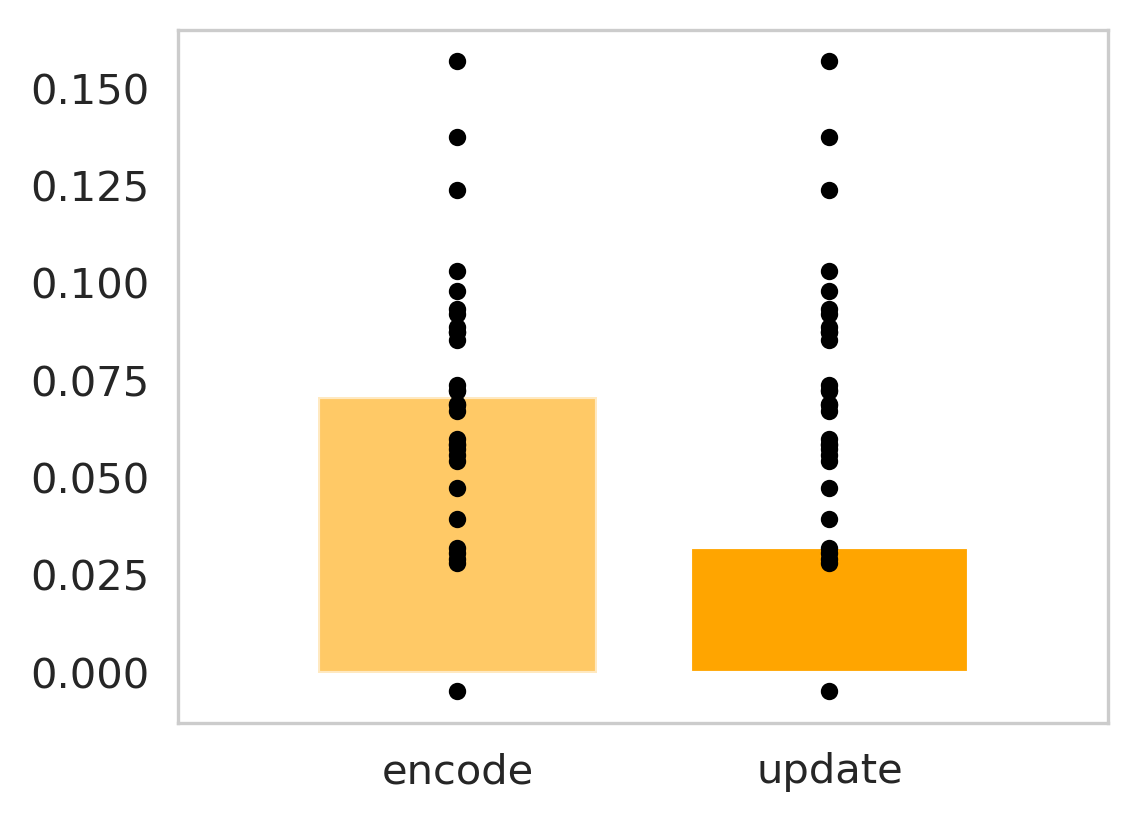

In [274]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# 그래프 그리기
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=300, sharey=True)

# 바 그래프 그리기
ax.bar([0+0.1], np.array(content_diff_score_va.mean(axis=0)).mean(),width=0.6,
       color='orange', alpha = 0.6)
ax.bar([1-0.1], np.array(content_diff_score_av.mean(axis=0)).mean(),width=0.6,
       color='orange')

# 산포도 그리기
ax.scatter(np.full(30, 0+0.1), content_diff_score_va.mean(axis=0), color='black', zorder=2, s= 10)
ax.scatter(np.full(30, 1-0.1), content_diff_score_va.mean(axis=0), color='black', zorder=2, s = 10)

# x축과 y축 설정
ax.set_xticks([0+0.1, 1-0.1])
ax.set_xticklabels(['encode', 'update'])
# ax.set_ylim(0, 0.98)
ax.set_xlim(-0.5, 1.5)
ax.grid(False)

# 그래프 저장
plt.savefig("Mean_Contants_Score_with_Scatter.jpg")

# 그래프 출력
plt.show()


In [70]:
content_va = content_score_matrix_va.mean(axis=1)[:,:,1]
content_av = content_score_matrix_av.mean(axis=1)[:,:,0]
print(content_va.shape)
#print(np.corrcoef(corr_av,content_av)[0,1])

(4, 30)


Correlation coefficient after outlier removal: -0.04863355840384266


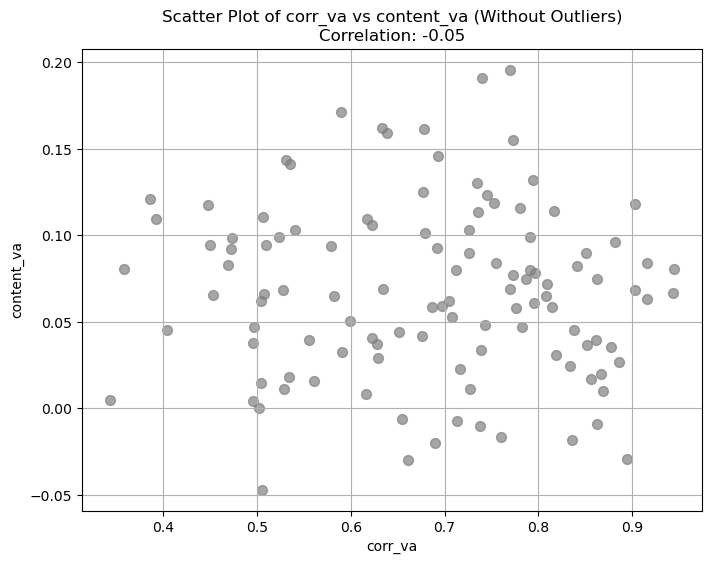

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming corr_va and content_va are your two variables
# Replace these with your actual data arrays
# corr_va = np.array([...])
# content_diff_score = np.array([...])

# Define a function to remove outliers using IQR
def remove_outliers(x, y):
    Q1_x = np.percentile(x, 25)
    Q3_x = np.percentile(x, 75)
    IQR_x = Q3_x - Q1_x

    Q1_y = np.percentile(y, 25)
    Q3_y = np.percentile(y, 75)
    IQR_y = Q3_y - Q1_y

    # Outliers are those points outside of 1.5 * IQR from the Q1 and Q3
    non_outliers = ((x >= Q1_x - 1.5 * IQR_x) & (x <= Q3_x + 1.5 * IQR_x) & 
                    (y >= Q1_y - 1.5 * IQR_y) & (y <= Q3_y + 1.5 * IQR_y))

    return x[non_outliers], y[non_outliers]

# Remove outliers
corr_va_cleaned, content_diff_score_cleaned = remove_outliers(corr_va, content_diff_score)

# Calculate and print the correlation coefficient
correlation = np.corrcoef(corr_va_cleaned, content_diff_score_cleaned)[0, 1]
print("Correlation coefficient after outlier removal:", correlation)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(corr_va_cleaned, content_diff_score_cleaned, color='gray', s=50, alpha=0.7)  # Adjust 's' for point size and 'alpha' for transparency

# Add title and labels
plt.title(f'Scatter Plot of corr_va vs content_va (Without Outliers)\nCorrelation: {correlation:.2f}')
plt.xlabel('corr_va')
plt.ylabel('content_va')

# Show the plot
plt.grid(True)
plt.show()


In [72]:
corr_va.shape

(4, 30)

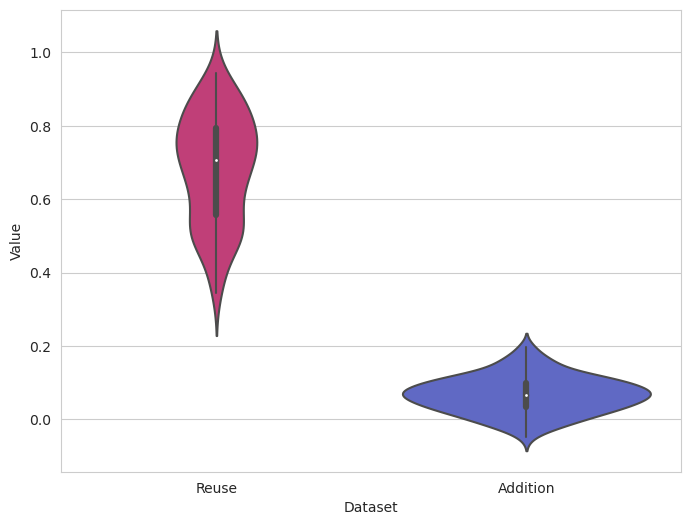

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 생성
df = pd.DataFrame({
    'Value': np.concatenate([corr_va_cleaned, content_diff_score_cleaned]),
    'Dataset': ['Reuse']*len(corr_va_cleaned) + ['Addition']*len(content_diff_score_cleaned)
})

# 팔레트 설정
palette = {'Reuse': '#d62976', 'Addition': '#4f5bd5'}

# 바이올린 플롯 그리기
plt.figure(figsize=(8, 6))
sns.violinplot(x='Dataset', y='Value', data=df, palette=palette)
plt.show()


In [186]:
content_concat1.shape

(4, 4)

Correlation coefficient: 0.5045448594912748


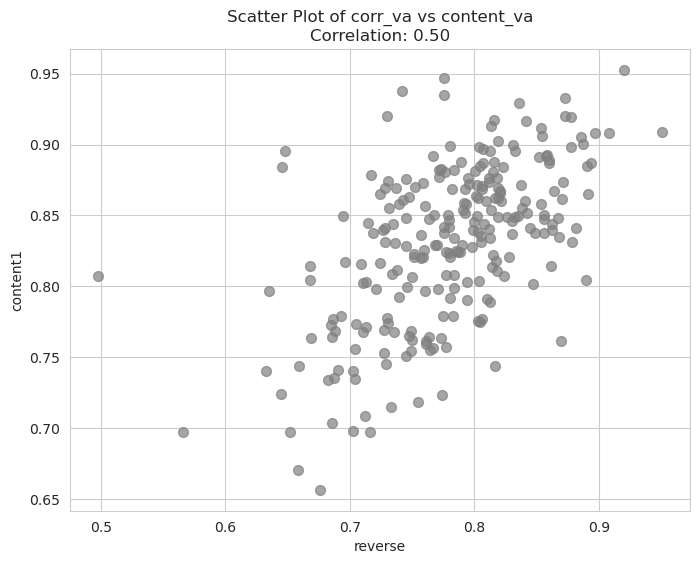

In [196]:
import matplotlib.pyplot as plt

# Assuming corr_va and content_va are your two variables
# Replace these with your actual data arrays
# corr_va = np.array([...])
# content_va = np.array([...])

# Calculate and print the correlation coefficient

correlation = np.corrcoef(content_concat1, content_concat2)[0,1]
print("Correlation coefficient:", correlation)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(content_concat1, content_concat2, color='gray', s=50, alpha=0.7)  # Adjust 's' for point size and 'alpha' for transparency

# Add title and labels
plt.title(f'Scatter Plot of corr_va vs content_va\nCorrelation: {correlation:.2f}')
plt.xlabel('reverse')
plt.ylabel('content1')

# Show the plot
plt.grid(True)
plt.show()


Correlation coefficient: 0.44349858876319137


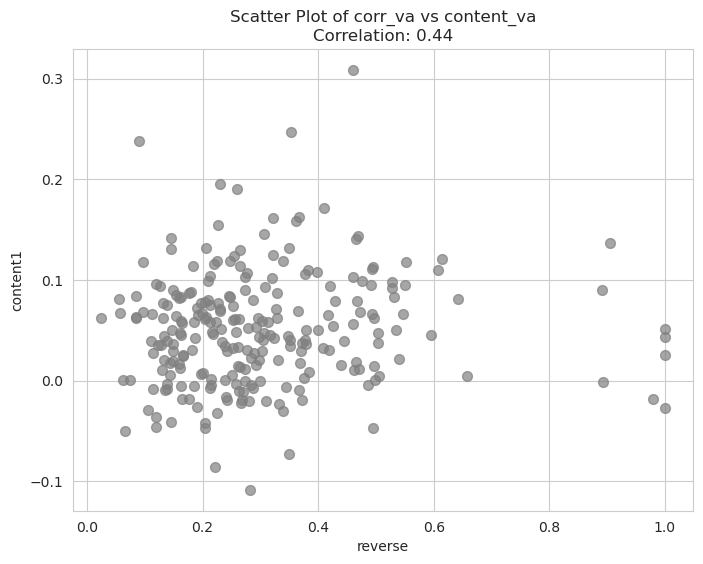

In [197]:
import matplotlib.pyplot as plt

# Assuming corr_va and content_va are your two variables
# Replace these with your actual data arrays
# corr_va = np.array([...])
# content_va = np.array([...])

# Calculate and print the correlation coefficient

diff_concat = content_concat2 -content_concat1

corr_concat = np.concatenate((corr_va,corr_av),axis=1)
reverse = 1-corr_concat

correlation = np.corrcoef(reverse, diff_concat)[0,1]
print("Correlation coefficient:", correlation)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reverse, diff_concat, color='gray', s=50, alpha=0.7)  # Adjust 's' for point size and 'alpha' for transparency

# Add title and labels
plt.title(f'Scatter Plot of corr_va vs content_va\nCorrelation: {correlation:.2f}')
plt.xlabel('reverse')
plt.ylabel('content1')

# Show the plot
plt.grid(True)
plt.show()


Correlation coefficient: 0.09786906384615354


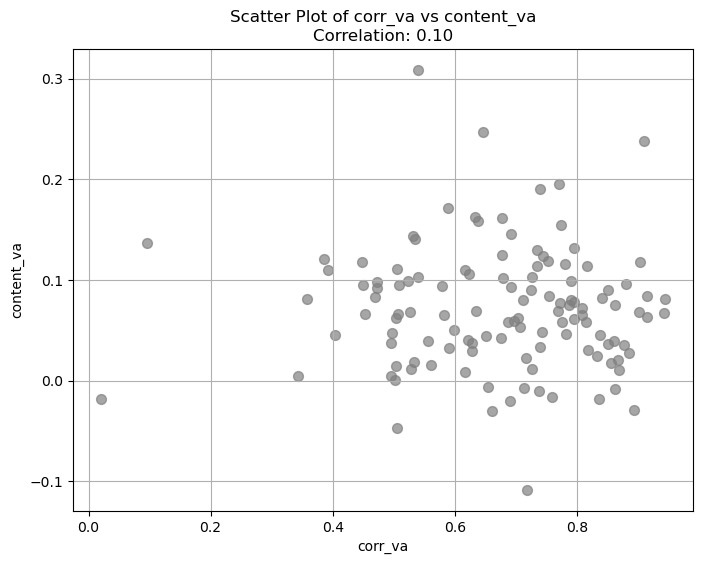

In [34]:
import matplotlib.pyplot as plt

# Assuming corr_va and content_va are your two variables
# Replace these with your actual data arrays
# corr_va = np.array([...])
# content_va = np.array([...])

# Calculate and print the correlation coefficient
correlation = np.corrcoef(corr_va, content_diff_score)[0,1]
print("Correlation coefficient:", correlation)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(corr_va, content_diff_score, color='gray', s=50, alpha=0.7)  # Adjust 's' for point size and 'alpha' for transparency

# Add title and labels
plt.title(f'Scatter Plot of corr_va vs content_va\nCorrelation: {correlation:.2f}')
plt.xlabel('corr_va')
plt.ylabel('content_va')

# Show the plot
plt.grid(True)
plt.show()


In [89]:
content_score_matrix_va.mean(axis=1).shape

(4, 30, 2)